The shortest path from Islamabad to Karachi is: ['Islamabad', 'Rawalpindi', 'Quetta', 'Karachi']


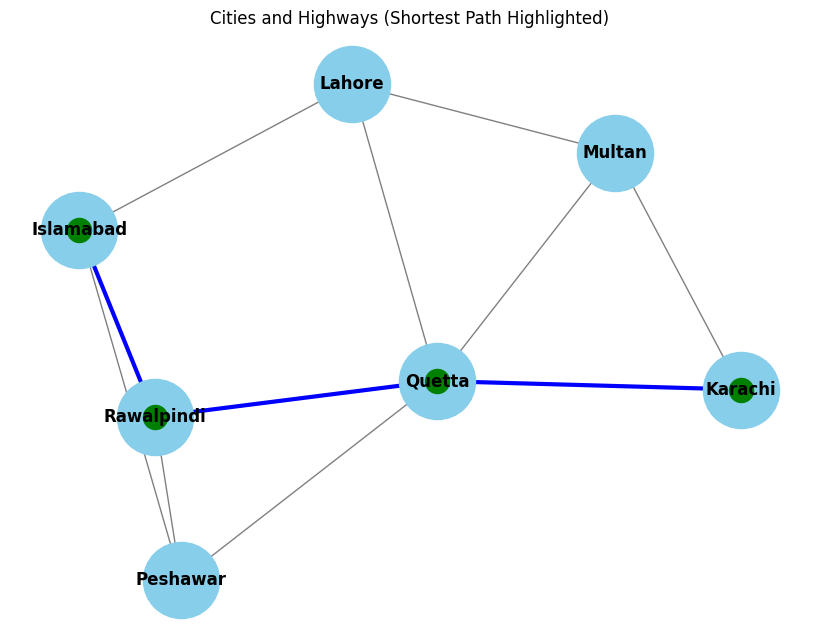

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

#Imagine you're a tourist in Pakistan, and you want to travel from Islamabad to Karachi. You
#want to find the shortest route in terms of the number of cities you need to travel through. The
#cities are connected through highways, and your goal is to find the shortest path using BFS.

# Step 1: Define the cities and their connections as a graph (adjacency list)
city_graph = {
    'Islamabad': ['Rawalpindi', 'Lahore', 'Peshawar'],
    'Rawalpindi': ['Islamabad', 'Peshawar', 'Quetta'],
    'Peshawar': ['Islamabad', 'Rawalpindi', 'Quetta'],
    'Lahore': ['Islamabad', 'Multan', 'Quetta'],
    'Multan': ['Lahore', 'Karachi', 'Quetta'],
    'Quetta': ['Rawalpindi', 'Peshawar', 'Multan', 'Karachi'],
    'Karachi': ['Multan', 'Quetta']
}

# Step 2: Implement BFS to find the shortest path
def bfs_shortest_path(graph, start, goal):
    # Maintain a queue of paths
    queue = deque([[start]])

    # Set to keep track of visited cities
    visited = set()

    # BFS loop
    while queue:
        # Get the first path from the queue
        path = queue.popleft()

        # Get the last city from the path
        city = path[-1]

        # If the city is the goal, return the path
        if city == goal:
            return path

        # If city has not been visited
        if city not in visited:
            # Mark it as visited
            visited.add(city)

            # Add paths to the neighboring cities to the queue
            for neighbor in graph[city]:
                new_path = list(path)  # Create a new path list
                new_path.append(neighbor)  # Add the neighbor to the path
                queue.append(new_path)

    # If no path is found, return None
    return None

# Step 3: Use the BFS function to find the shortest path from Islamabad to Karachi
shortest_path = bfs_shortest_path(city_graph, 'Islamabad', 'Karachi')

# Output the result
print(f"The shortest path from Islamabad to Karachi is: {shortest_path}")

# Step 4: Visualize the graph using NetworkX
def draw_graph(graph):
    G = nx.Graph()

    # Add edges between cities
    for city, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(city, neighbor)

    # Draw the graph
    pos = nx.spring_layout(G)  # Layout for a clean visual representation
    plt.figure(figsize=(8, 6))

    # Draw nodes, edges, and labels
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')

    # Highlight the shortest path if found
    if shortest_path:
        path_edges = list(zip(shortest_path, shortest_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3, edge_color='blue')
        nx.draw_networkx_nodes(G, pos, nodelist=shortest_path, node_color='green')

    plt.title('Cities and Highways (Shortest Path Highlighted)')
    plt.show()

# Step 5: Call the draw_graph function to display the graph
draw_graph(city_graph)
